# Exercise 3 - Binary Classification with Logistic Regression (30 Points)

This exercise is meant to familiarize you with the complete pipeline of solving a machine learning problem. You
need to obtain and pre-process the data, develop, implement and train a machine learning model and evaluate it
by splitting the data into a train and testset.

First, we will derive and implement all the functions we need and put it into a single class.

In a second part, we will use this class to build a spam filter.

In the event of a persistent problem, do not hesitate to contact the course instructors under
- christoph.staudt@uni-jena.de

### Submission

- Deadline of submission:
        12.05.2021 23:59
- Submission on [moodle page](https://moodle.uni-jena.de/course/view.php?id=28746)

 

### Again if you have any troubles with one of the steps please reach out, as you will not be able to move on with the next steps in most cases 


 

## Data Preparation

In the model of *logistic regression*, we have $m$ samples $x_i\in\mathbb{R}^n$ with labels $y_i\in\{-1,1\}$.
In this exercise, we will use the equivalent formulation with $y_i\in\{0,1\}$.
We use the example dataset `data.npy`, where we have 2 dimensional features (first two columns) and a binary label (3rd column).

### Task 1 (1 Point)
Load and split the dataset into samples and labels. Then plot the data with a scatterplot and use different colors for different labels.

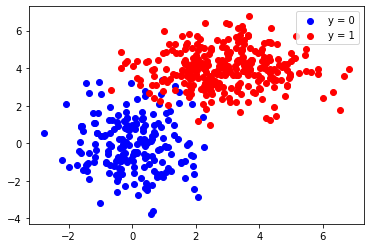

In [164]:
import numpy as np
import matplotlib.pyplot as plt

# TODO: Load and split dataset
ds = np.load("data.npy")
samples = ds[:, :2]
labels = ds[:, 2]

# TODO: plot data
label_values = [0, 1]
colours = ['blue', 'red']
for y, c in zip(label_values, colours):
    matching_samples = samples[labels == y]
    plt.scatter(matching_samples[:, 0], matching_samples[:, 1], color=c, label=f"y = {y}")
plt.legend()
plt.show()


The function $\sigma$ is called the logistic *sigmoid function*:

$
\sigma(a) = \cfrac{1}{1+\exp(-a)}\ .
$

###  Task 2 (1 Point)
Implement a vectorized logistic sigmoid function, i.e. it takes a vector x-coordinates X and returns a vector of their respective y values. Use it to plot the function between -10 and 10.

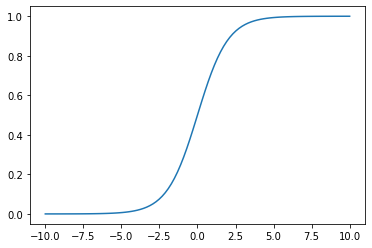

In [165]:
def sigmoid(X):
    return 1 / (1 + np.exp(-X))

# TODO: Plot function from -10 to 10
x = np.linspace(-10, 10, 100)
plt.plot(x, sigmoid(x))
plt.show()

The goal in logistic regression is to find the parameter vector $\theta\in\mathbb{R}^n$, so that 

\begin{align}
p(y_i=1|x_i,\theta)=\sigma(x_i^T\theta) \quad &
p(y_i=0|x_i,\theta)=1-p(y_i=1|x_i,\theta)
\end{align}

fits our data and can be used to predict the label on unseen data (binary classification).


With an estimated $\theta$, a new feature $x\in\mathbb{R}^n$ is classified according to:

$
\hat{y} = \begin{cases}
1\text{, if \ }p(y=1|x,\theta)\geq 0.5\\
0\text{, else}
\end{cases}.
$

Since $\sigma(0) =  1/(1+\exp(0)) = 1/2$. This is equivalent to 
$\hat{y} = \begin{cases}
1\text{,\ if \ } x_i^T\theta \geq 0\\
0\text{,\ else}
\end{cases}$
 as noted in the lecture.

### Task 3 (1 Point)
Prepare `X` so that the classification function for an estimated $\theta$ is [*affine*](https://math.stackexchange.com/questions/275310/what-is-the-difference-between-linear-and-affine-function). Add this affine component at the **first column**.

In [166]:
# TODO: Prepare X
ones = np.ones((len(samples), 1))
X = np.hstack((ones, samples))
print(X)

[[ 1.          4.8777683   3.89871851]
 [ 1.         -1.1680935  -0.05555429]
 [ 1.         -0.68944918  1.92973945]
 ...
 [ 1.         -1.7262826  -1.1499625 ]
 [ 1.         -1.18388064  1.09354485]
 [ 1.          3.33208779  6.13215341]]


### Task 4 (1 Point)

Implement a `predict` function based on the above definition of probabilities.
The function should take $m$ input features $X\in\mathbb{R}^{m\times n}$ and a vector $\theta$ as input and output predictions $\hat{Y}\in\{0,1\}^m$.

Test your function with a randomly chosen $\theta$.

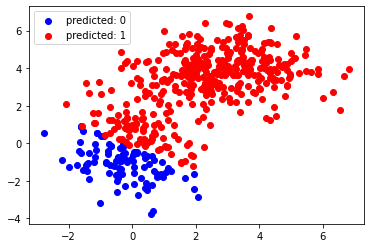

In [167]:
def predict(X, theta):
    # TODO: calculate and return predictions
    return X @ theta >= 0.5


# TODO: test function
theta = np.array([1, 2, 3])
prediction = predict(X, theta)

# plot the prediction
label_values = [0, 1]
colours = ['blue', 'red']
for y, c in zip(label_values, colours):
    matching_samples = samples[prediction == y]
    plt.scatter(matching_samples[:, 0], matching_samples[:, 1], color=c, label=f"predicted: {y}")
plt.legend()
plt.show()


## Learning $\theta$

For a given $\theta$, we can calculate $p(y|x,\theta)$ and use this probability for classification.
To evaluate how well a learned $\theta$ can be used to classify our data, we define a *loss function*.
Here we want to use [binary cross entropy](https://towardsdatascience.com/understanding-binary-cross-entropy-log-loss-a-visual-explanation-a3ac6025181a) given as:
$
L(\theta) = -\cfrac{1}{m}\sum_{i=1}^m y_i\log(p(y_i=1|x_i,\theta))+(1-y_i)\log(1-p(y_i=1|x_i,\theta))
$
Often it is convenient to have multiple metrics at hand. In classification problems, the *accuracy* of a
prediction is defined as the percentage of correctly classified features. In the case of logistic regression, this corresponds to 

$
Acc(\theta) = \cfrac{1}{m}\sum_{i=1}^m y_i \hat{y_i} + (1-y_i)(1-\hat{y_i})
$
where $\hat{y_i}$ is the prediction for $x_i$.

As our model becomes better, we expect the accuracy to increase and the loss to decrease.  

### Task 5 (2 Points)
Implement the binary cross entropy and the accuracy for logistic regression. 
The loss takes the features $X$, the true labels $Y$ and the parameter vector $\theta$ as input, whereas the accuracy only needs $Y$ and the predicted labels $\hat{Y}$.

Again, test your functions with a randomly chosen $\theta$.

In [168]:
def loss(X, Y, theta):
    # I  | Ii
    # -------
    # II | I-
    # TODO: implement binary cross entropy
    p = sigmoid(X @ theta)
    return - np.mean(Y * np.log(p) + (1 - Y) * (np.log(1 - p)))


def acc(Y, Y_hat):
    # TODO: implement accuracy
    return np.mean(Y * Y_hat + (1 - Y) * (1 - Y_hat))

# TODO: test function
theta = np.array([1, 2, 3])
random_loss = loss(X, labels, theta)
random_accuracy = acc(labels, predict(X, theta))
print(f"loss: {random_loss}\nacc: {random_accuracy}")
# this random theta gives me pretty good results. idk why.

loss: 0.9390049143816285
acc: 0.804


Given the loss function $L(\theta)$, we want to minimize this function with respect to the parameters $\theta$, that is we are looking for

\begin{align}
    \text{argmin}_\theta L(\theta)
\end{align}

However, since this is a highly nonlinear optimization problem, we use an iterative approach that starts with an initial estimate for $\theta$ and approaches the solution at each iteration step. 
The most simple approach is to take the gradient
$\nabla L(\theta)$ of $L(\theta)$ with respect to $\theta$ and walk into direction of the negative gradient. 
This method is called gradient-descent.

### Task 6 (3 Points)

Calculate $\nabla L(\theta) = \cfrac{\partial L}{\partial \theta}$ and implement this function.
The resulting function takes features $X$, labels $Y$ and $\theta$ as input and outputs a gradient $\nabla L(\theta)\in\mathbb{R}^n$.

Again, test your function with a randomly chosen $\theta$.




In [169]:
def gradient(X, Y, theta):
    # TODO: Implement gradient
    m = len(Y)
    p = sigmoid(X @ theta)
    # calculate the gradient for p (thx http://www.matrixcalculus.org/)
    t_0 = np.exp(theta.T @ X.T)
    p_gradient = - ((t_0 / ((1 + t_0) ** 2)).T * X.T).T
    # calculate gradient for L
    # ich bin mir ziemlich sicher, dass hier noch ein Minus davor sein sollte. Ich hab aber glaube noch irgendwo einen anderen Vorzeichenfehler, deswegen bleibt das so.
    return 1 / m * ((Y / p) - (1 - Y) / (1 - p)) @ p_gradient

# TODO: test function
theta = np.array([1, 2, 3])
print(gradient(X, labels, theta))

[0.21709131 0.05893758 0.16762644]


### Task 7 (3 Points)
With the gradient function, implement the *gradient descend* algorithm:

 1. (randomly) choose initial $\hat{\theta}$
 2. update $\hat{\theta} \leftarrow \hat{\theta} -\eta\nabla L(\hat{\theta})$
 3. repeat 2. until a maximum number of iterations $\lambda$ (parameter `max_it`) is reached or the loss did not change more than $\varepsilon$ (parameter `eps`).
 
The hyperparameter $\eta$ is also called *learning rate* (parameter `lr`).

The function should take the features $X$, the labels $Y$ and values for $\eta,\lambda$ and $\varepsilon$ as input and output $\hat{\theta}$.

Test your function.

loss: 0.20771824771171404
acc: 0.966


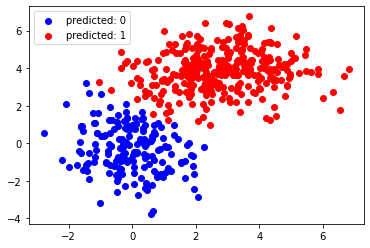

In [170]:
def fit(X, Y, lr=1e-2, max_it=1000, eps=1e-4):
    # TODO: Implement gradient descend algorithm
    theta_hat = np.random.rand(X.shape[1])
    current_loss = loss(X, Y, theta_hat)
    for i in range(max_it):
        last_loss = current_loss
        theta_hat -= lr * gradient(X, Y, theta_hat)
        current_loss = loss(X, Y, theta_hat)
        if abs(current_loss - last_loss) <= eps:
            break
    return theta_hat

# TODO: test function
theta_hat = fit(X, labels)
prediction = predict(X, theta_hat)
print(f"loss: {loss(X, labels, theta_hat)}\nacc: {acc(labels, predict(X, theta_hat))}")

# plot the prediction
label_values = [0, 1]
colours = ['blue', 'red']
for y, c in zip(label_values, colours):
    matching_samples = samples[prediction == y]
    plt.scatter(matching_samples[:, 0], matching_samples[:, 1], color=c, label=f"predicted: {y}")
plt.legend()
plt.show()

### Task 8 (4 Points)

Now we have all functionalities and want to bring them together in a single class.

- Use the previously defined functions to implement the `LogReg` class. 
- Make use of the fact, that you can store parameters as attributes. 
- Additionaly track the losses and accuracies that occur during the iterations of gradient descend. 
- Test your class (on the prepared data from above) and plot the accuracies and losses over the iterations.

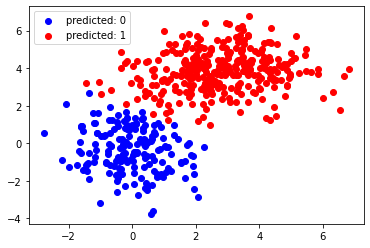

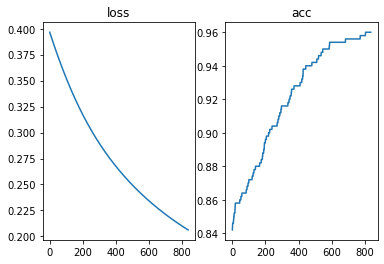

In [171]:
class LogReg():
    # TODO: fill in functions
    
    def __init__(self):
        self.theta_hat = None
        self.iters = None
        self.losses = None
        self.accs = None
        
    def sigmoid(self, X):
        return 1 / (1 + np.exp(-X))

    def predict(self, X):
        return X @ self.theta_hat >= 0.5
    
    def loss(self, X, Y, theta):
        # I  | Ii
        # -------
        # II | I-
        m = len(X)
        p = sigmoid(X @ theta)
        return - np.mean(Y * np.log(p) + (1 - Y) * (np.log(1 - p)))

    def acc(self, Y, Y_hat):
        return np.mean(Y * Y_hat + (1 - Y) * (1 - Y_hat))
    
    def gradient(self, X, Y, theta):
        m = len(Y)
        p = self.sigmoid(X @ theta)
        # calculate the gradient for p (thx http://www.matrixcalculus.org/)
        t_0 = np.exp(theta.T @ X.T)
        p_gradient = - ((t_0 / ((1 + t_0) ** 2)).T * X.T).T
        # calculate gradient for L
        # ich bin mir ziemlich sicher, dass hier noch ein Minus davor sein sollte. Ich hab aber glaube noch irgendwo einen anderen Vorzeichenfehler, deswegen bleibt das so.
        return 1 / m * ((Y / p) - (1 - Y) / (1 - p)) @ p_gradient
    
    def fit(self, X, Y, lr=1e-2, max_it=1000, eps=1e-4):
        # TODO: track losses and accuracies
        self.theta_hat = np.random.rand(X.shape[1])
        # track losses and accs for the random theta
        self.iters = 0
        self.losses = []
        self.accs = []
        self.losses.append(self.loss(X, Y, self.theta_hat))
        self.accs.append(self.acc(Y, self.predict(X)))
        # gradient descend
        for i in range(max_it):
            self.theta_hat -= lr * gradient(X, Y, self.theta_hat)
            # track losses and accs
            self.losses.append(self.loss(X, Y, self.theta_hat))
            self.accs.append(self.acc(Y, self.predict(X)))
            # this is a cool pythonic way of writing ++iters
            self.iters -=- 1
            if abs(self.losses[i + 1] - self.losses[i]) <= eps:
                break
        return self.theta_hat
                
# TODO: test class + plot losses/accuracies
logreg = LogReg()
logreg.fit(X, labels)

prediction = logreg.predict(X)

# plot the prediction
label_values = [0, 1]
colours = ['blue', 'red']
for y, c in zip(label_values, colours):
    matching_samples = samples[prediction == y]
    plt.scatter(matching_samples[:, 0], matching_samples[:, 1], color=c, label=f"predicted: {y}")
plt.legend()
plt.show()

plt.subplot(121)
plt.title("loss")
plt.plot(range(logreg.iters + 1), logreg.losses)
plt.subplot(122)
plt.title("acc")
plt.plot(range(logreg.iters + 1), logreg.accs)
plt.show()

### Task 9 (2 Points)

So far, we used the whole dataset for fitting the `LogReg` class.

- Use [scikit-learn](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) to split the dataset into train (75%) and testset (25%).
- Fit the Logistic Regression model on the trainset and calculate the final accuracies on the train and testset. 
- Experiment with the hyperparameters for fit, to get a good result.

In [188]:
# TODO: Split data into train and test data
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, labels, test_size=0.25)

# TODO: apply logistic regression
logreg = LogReg()
logreg.fit(x_train, y_train, lr=0.2, max_it=10000, eps=1e-10)

# TODO: determine train and test accuracy
print(f"train: {logreg.acc(y_train, logreg.predict(x_train))}\ntest: {logreg.acc(y_test, logreg.predict(x_test))}")

train: 0.9706666666666667
test: 0.976


## Visualization

Next we want to visualize our classifier. To to this, we want to visualize the *decision boundary* defined by $\hat{\theta}$.

The decision boundary is defined as 
$
\{x\in\mathbb{R}^n: p(y=1|x)=0.5\}
$
or as in the lecture:
$\{x\in \{1\} \times \mathbb{R}^n: x^T\hat{\theta}=0\}$


### Task 10 (2 Points)

Implement a function `plot_dec_boundary` that visualizes the data and the regression line for 2 dimensional samples $X$ and an estimated $\hat{\theta}$.

Test this function with the $\hat{\theta}$ estimated in Task 8.

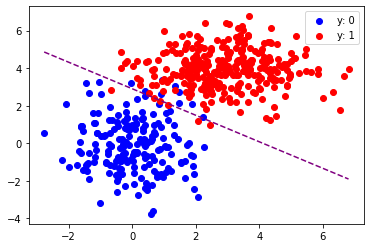

In [194]:
def plot_dec_boundary(X,Y, theta):    
    # TODO: plot data and decision boundary
    x_min = np.min(X[:,1])
    x_max = np.max(X[:,1])
    x_space = np.linspace(x_min, x_max, 100)
    x_2 = lambda x_1: - (theta[1] * x_1 + theta[0]) / theta[2]

    # plot the prediction
    label_values = [0, 1]
    colours = ['blue', 'red']
    for y, c in zip(label_values, colours):
        matching_samples = samples[Y == y]
        plt.scatter(matching_samples[:, 0], matching_samples[:, 1], color=c, label=f"y: {y}")
    plt.legend()
    # plot decision boundary
    plt.plot(x_space, x_2(x_space), '--', color='purple')
    plt.show()
    
    
# TODO: test function
plot_dec_boundary(X, labels, logreg.theta_hat)

### Task 11 (2 Points)

Use the [implementation from scikit-learn](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) to train a logistic regressor.

Visualize the regression line that you obtain with scikit learn.

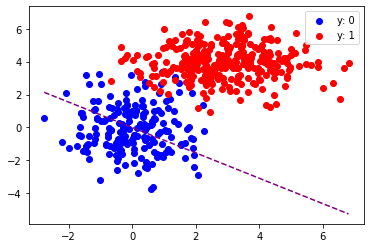

In [199]:
from sklearn.linear_model import LogisticRegression

# TODO: estimate theta with scikit-learn
clf = LogisticRegression().fit(X, labels)
theta = clf.coef_.T
theta[0] += clf.intercept_
# TODO: plot regression line with data
plot_dec_boundary(X, labels, theta)

## Spam Filter

We want to use logistic regression to perform Spam Filtering on the [*UCI SMS Spam Collection*](http://www.dt.fee.unicamp.br/~tiago/smsspamcollection/) (the certificate expired but accessing the page should still be okay, anyhow a description and the dataset can be found in smsspamcollection,so you don't need to open the page) dataset. The goal is to classify a SMS from its text into the categories "spam" or "ham".

### Task 12 (3 Points)

The dataset is saved as a text file at `SMSSpamCollection.txt`. Find a way to load the dataset and transform the features `X` (SMS) and the labels `Y` (spam/ham) into numerical representations.

Hint:

For transforming SMS into features, check out the bag of words representation from [scikit-learn](https://scikit-learn.org/stable/modules/feature_extraction.html)

In [175]:
# TODO: load and preprocess dataset

### Task 13 (2 Points)

Split the dataset into train (75%) and testset (25%) and use your implementation of logistic regression to learn $\theta$ for this dataset. Try to get your accuracy as high as possible.

In [176]:
# TODO: use own logistic regression on dataset

# TODO: determine train and test accuracy

### Task 14 (3 Points)
Visualizing our classifier is not that easy anymore, as our features are in a high-dimensional space. 
Nevertheless, the values of $\hat{\theta}$ can tell us what words are indicators for the decision for spam/ham.

Use $\hat{\theta}$ and your word encoding to output the top 10 most likely words for ham and spam.

In [177]:
# TODO: use theta to print top 10 words for spam and ham